# Outlier Detection and Removal in MW Column

This notebook performs outlier analysis on the MW (Megawatt) column of the Baneshwor feeder dataset. Double-digit MW values (≥ 10 MW) are considered technically infeasible for this feeder and are treated as outliers.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (24528, 5)

First 5 rows:


,Time,MW,Air Temperature,Global Solar Radiation,Relative Humidity
0,2022-10-19 01:00,0.8,14.50,0.0,88.8
1,2022-10-19 02:00,0.8,14.40,0.0,87.9
2,2022-10-19 03:00,0.8,14.00,0.0,92.3
3,2022-10-19 04:00,0.8,13.20,0.0,95.8
4,2022-10-19 05:00,0.8,12.65,0.0,97.9


## Identifying Outliers in MW Column

For the Baneshwor feeder, double-digit MW values (≥ 10 MW) are technically infeasible. We identify these records as outliers.

In [3]:
# Check for double-digit MW values (outliers)
outliers = df[df['MW'] >= 10]
print(f"Number of outliers (MW ≥ 10): {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
print(f"\nOutlier MW values range: {outliers['MW'].min():.2f} to {outliers['MW'].max():.2f}")
print(f"\nOutlier records:")
outliers

Number of outliers (MW ≥ 10): 56
Percentage of outliers: 0.23%

Outlier MW values range: 10.30 to 404.00

Outlier records:


,Time,MW,Air Temperature,Global Solar Radiation,Relative Humidity
24,2022-10-20 01:00,57.0,13.400,0.0,94.8
25,2022-10-20 02:00,54.0,12.900,0.0,95.4
26,2022-10-20 03:00,53.0,12.500,0.0,99.7
27,2022-10-20 04:00,53.0,12.000,0.0,100.0
28,2022-10-20 05:00,64.0,11.650,0.0,100.0
29,2022-10-20 06:00,78.0,11.300,0.0,100.0
30,2022-10-20 07:00,104.0,11.500,17.3,100.0
31,2022-10-20 08:00,128.0,13.800,166.0,94.1
32,2022-10-20 09:00,124.0,16.600,375.0,78.4
33,2022-10-20 10:00,123.0,18.800,578.9,67.8


## Boxplot: Before Outlier Removal

The boxplot below shows the distribution of MW values including the outliers (double-digit values).

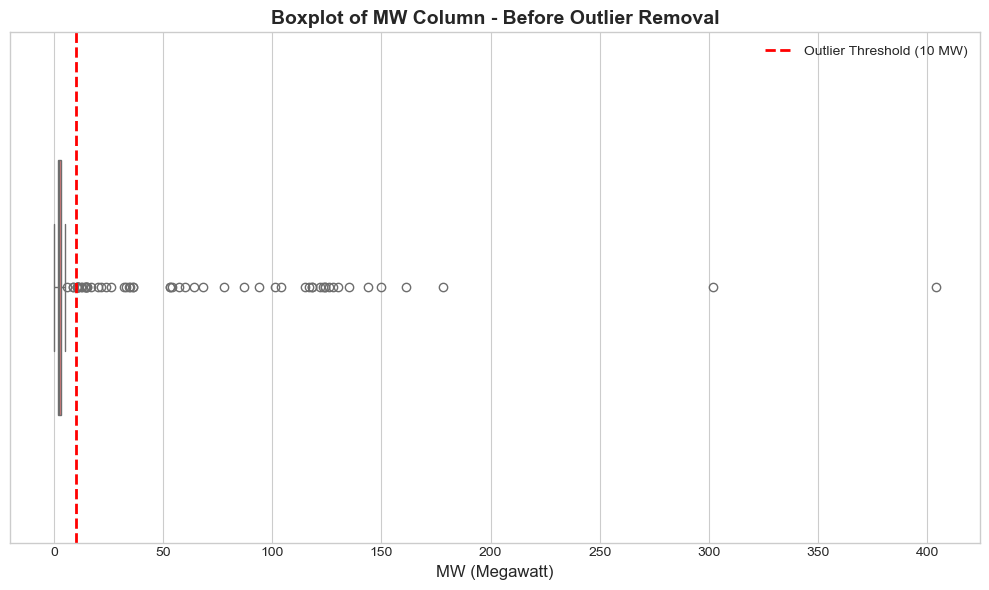

Figure saved as 'boxplot_before_outlier_removal.png'


In [4]:
# Boxplot BEFORE outlier removal
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x=df['MW'], ax=ax, color='#FF6B6B', width=0.5)
ax.set_xlabel('MW (Megawatt)', fontsize=12)
ax.set_title('Boxplot of MW Column - Before Outlier Removal', fontsize=14, fontweight='bold')
ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Outlier Threshold (10 MW)')
ax.legend()

plt.tight_layout()
plt.savefig('boxplot_before_outlier_removal.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'boxplot_before_outlier_removal.png'")

## Outlier Removal

Removing all records where MW ≥ 10 (hard threshold approach). These double-digit MW values are technically infeasible for the Baneshwor feeder.

In [5]:
# Remove outliers (MW >= 10) using hard threshold
df_cleaned = df[df['MW'] < 10].copy()

print(f"Original dataset size: {len(df)} records")
print(f"Cleaned dataset size: {len(df_cleaned)} records")
print(f"Records removed: {len(df) - len(df_cleaned)}")
print(f"\nMW range after cleaning: {df_cleaned['MW'].min():.2f} to {df_cleaned['MW'].max():.2f}")

Original dataset size: 24528 records
Cleaned dataset size: 24352 records
Records removed: 176

MW range after cleaning: 0.00 to 8.50


## Boxplot: After Outlier Removal

The boxplot below shows the distribution of MW values after removing the outliers (double-digit values).

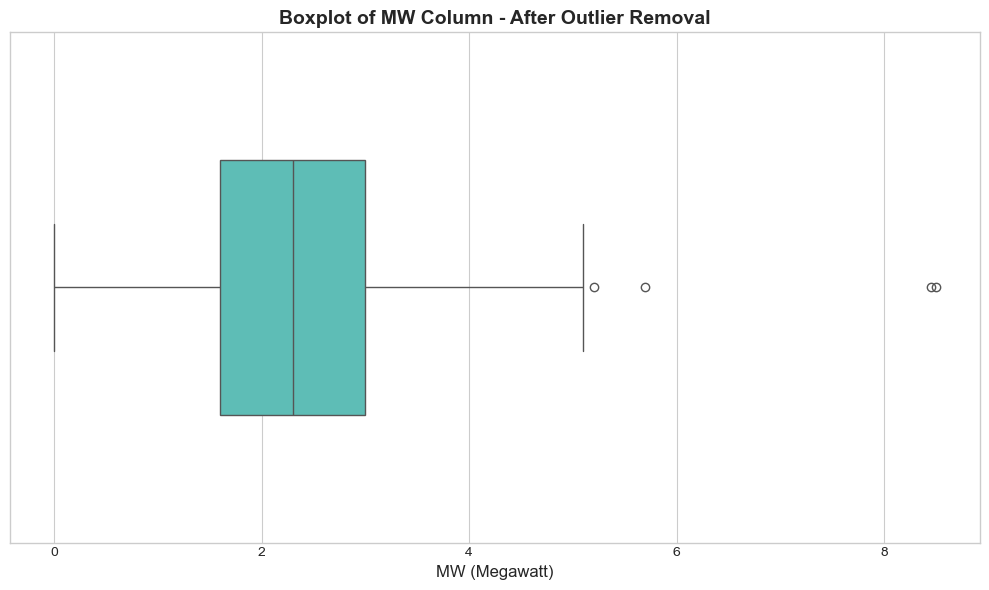

Figure saved as 'boxplot_after_outlier_removal.png'


In [6]:
# Boxplot AFTER outlier removal
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x=df_cleaned['MW'], ax=ax, color='#4ECDC4', width=0.5)
ax.set_xlabel('MW (Megawatt)', fontsize=12)
ax.set_title('Boxplot of MW Column - After Outlier Removal', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('boxplot_after_outlier_removal.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'boxplot_after_outlier_removal.png'")

## Side-by-Side Comparison: Before vs After Outlier Removal

A visual comparison of the MW distribution before and after outlier removal.

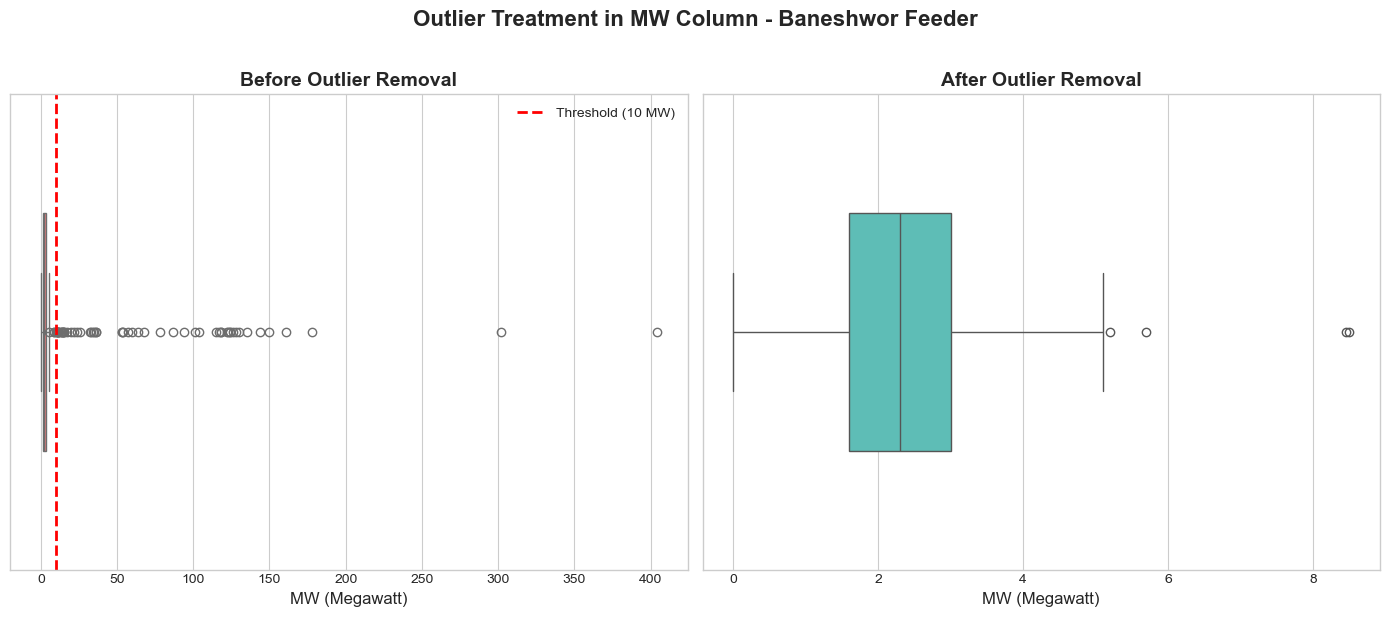

Figure saved as 'boxplot_comparison_before_after.png'


In [7]:
# Side-by-side comparison boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before outlier removal
sns.boxplot(x=df['MW'], ax=axes[0], color='#FF6B6B', width=0.5)
axes[0].set_xlabel('MW (Megawatt)', fontsize=12)
axes[0].set_title('Before Outlier Removal', fontsize=14, fontweight='bold')
axes[0].axvline(x=10, color='red', linestyle='--', linewidth=2, label='Threshold (10 MW)')
axes[0].legend()

# After outlier removal
sns.boxplot(x=df_cleaned['MW'], ax=axes[1], color='#4ECDC4', width=0.5)
axes[1].set_xlabel('MW (Megawatt)', fontsize=12)
axes[1].set_title('After Outlier Removal', fontsize=14, fontweight='bold')

plt.suptitle('Outlier Treatment in MW Column - Baneshwor Feeder', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('boxplot_comparison_before_after.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'boxplot_comparison_before_after.png'")

## Descriptive Statistics of the Cleaned Dataset (MW Column)

After removing the outliers, we compute the descriptive statistics of the MW column to understand the distribution of the cleaned data.

In [8]:
# Descriptive statistics of the cleaned dataset
print("=" * 60)
print("DESCRIPTIVE STATISTICS OF CLEANED DATASET")
print("=" * 60)
print(f"\nTotal Records: {len(df_cleaned)}")
print("\n--- Full Dataset Statistics ---")
print(df_cleaned.describe())

# MW Column specific statistics (as strongly recommended by supervisor)
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY OF MW COLUMN (Cleaned Dataset)")
print("=" * 60)

mw_stats = {
    'Mean': df_cleaned['MW'].mean(),
    'Median': df_cleaned['MW'].median(),
    'Standard Deviation (Std)': df_cleaned['MW'].std(),
    'Variance (Var)': df_cleaned['MW'].var(),
    'Minimum (Min)': df_cleaned['MW'].min(),
    'Maximum (Max)': df_cleaned['MW'].max()
}

for stat_name, stat_value in mw_stats.items():
    print(f"{stat_name}: {stat_value:.4f}")

# Create a summary table for the report
mw_summary_df = pd.DataFrame({
    'Statistic': list(mw_stats.keys()),
    'Value': [f"{v:.4f}" for v in mw_stats.values()]
})

print("\n--- MW Column Summary Table (for Report/Slide) ---")
mw_summary_df

DESCRIPTIVE STATISTICS OF CLEANED DATASET

Total Records: 24352

--- Full Dataset Statistics ---
                 MW  Air Temperature  Global Solar Radiation  \
count  24352.000000     24352.000000            24352.000000   
mean       2.348304        18.590672              186.334554   
std        0.918591         6.538818              265.824953   
min        0.000000         1.100000                0.000000   
25%        1.600000        13.800000                0.000000   
50%        2.300000        20.000000                7.401695   
75%        3.000000        23.200000              346.725000   
max        8.500000        32.900000             1105.600000   

       Relative Humidity  
count       24352.000000  
mean           78.929460  
std            23.796011  
min             5.900000  
25%            60.590625  
50%            89.500000  
75%           100.000000  
max           100.000000  

STATISTICAL SUMMARY OF MW COLUMN (Cleaned Dataset)
Mean: 2.3483
Median: 2.3000
Sta

,Statistic,Value
0,Mean,2.3483
1,Median,2.3000
2,Standard Deviation (Std),0.9186
3,Variance (Var),0.8438
4,Minimum (Min),0.0000
5,Maximum (Max),8.5000


## Save Cleaned Dataset

Saving the cleaned dataset (without outliers) for further analysis.

In [9]:
# Save the cleaned dataset
df_cleaned.to_csv('dataset_cleaned.csv', index=False)
print("Cleaned dataset saved as 'dataset_cleaned.csv'")
print(f"\nCleaned dataset contains {len(df_cleaned)} records")
print(f"MW values range: {df_cleaned['MW'].min():.2f} to {df_cleaned['MW'].max():.2f} (no double-digit values)")

Cleaned dataset saved as 'dataset_cleaned.csv'

Cleaned dataset contains 24352 records
MW values range: 0.00 to 8.50 (no double-digit values)


## Summary

### Outlier Treatment for Baneshwor Feeder MW Data

**Outlier Identification:**
- Outliers were defined as MW values ≥ 10 MW (double-digit values)
- These values are technically infeasible for the Baneshwor feeder

**Outlier Removal Method:**
- Hard threshold approach: All records with MW ≥ 10 were removed

**Results:**
- The boxplots above show the data distribution before and after outlier removal
- After cleaning, all MW values are within the feasible single-digit range

**Descriptive Statistics:**
- The statistical summary (mean, median, std, variance, min, max) of the cleaned MW column is provided for inclusion in the EDA section and presentation slides